In [15]:
# %pip install uv

In [16]:
# go to the current project path and run the below command in cmd or powershell
# uv init

# Buila a Basic Chatbot with Langgraph (GraphAPI)

## main components of Langgraph

1. Edges
2. Nodes
3. Stack

### ex project workflow

1. yt videos - ==transcript==
2. transcript - title
3. title, transcript - content

#### To solve this complex workflow we can use Langgraph and langgraph offer 2 types

1. Graph API (recommended and easiest way)
2. Functional API

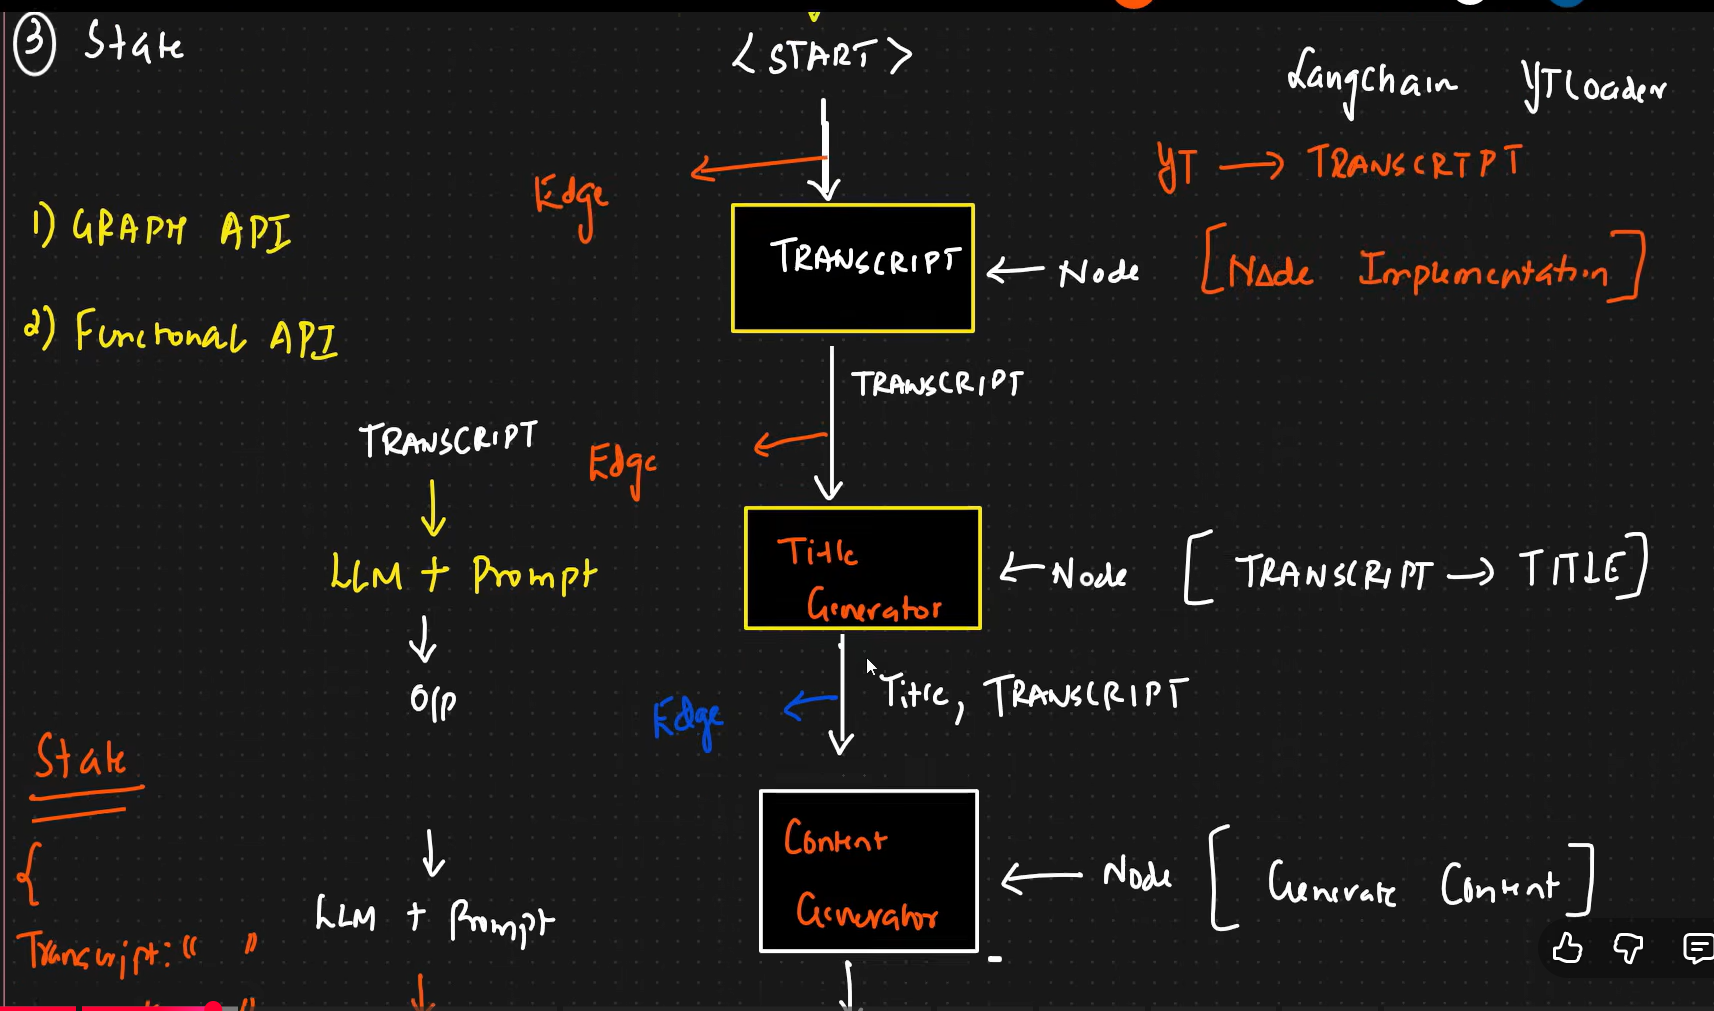

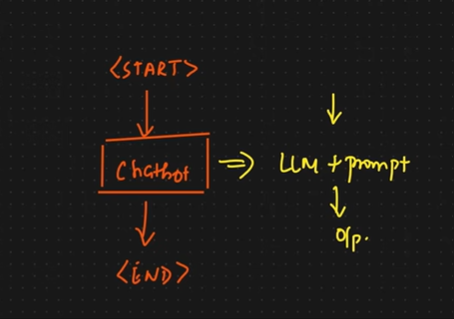

In [17]:
# Build a simple chatbout

In [18]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [19]:
# define a state

class State(TypedDict):
    # messages have the type 'list'. The 'add_messages' function
    # in the annotation defines how this state key should be updated
    # (in the case, it appends messages to the list, rather than overwriting them)
    # Annotated 
    messages: Annotated[list, add_messages]


# # build a graph builder
# graph_builder = StateGraph(State)
# graph_builder

In [20]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [21]:
from langchain_groq import ChatGroq
from langchain .chat_models import init_chat_model # 2nd approach to use llm models

llm = ChatGroq(model='llama-3.1-8b-instant')

# llm = init_chat_model("groq:llama3-8b-8192") # 2nd approach

In [22]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000259B72651F0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000259B8A9D880>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

## create a node

In [23]:
# Node functionality
def chatbot(state: State):
    return {'messages': [llm.invoke(state['messages'])]} # here state['messages] is basically a question and llm is generating an answer

## Build a graph

In [24]:
# build a graph
graph_builder = StateGraph(State)

# add node
graph_builder.add_node('llmchatbot', chatbot)

# add edges
graph_builder.add_edge(START, 'llmchatbot')
graph_builder.add_edge('llmchatbot', END)

# compile the graph
graph = graph_builder.compile()

In [25]:
# graph

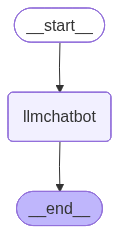

In [26]:
# Visualize the graph

from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

## Run the graph

In [27]:
# graph.invoke("hi") # error

In [29]:
response = graph.invoke({"messages": "Hi"})
response

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='7fd3a85c-c069-4716-a528-69a0f73e9706'),
  AIMessage(content="It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 36, 'total_tokens': 59, 'completion_time': 0.023974148, 'prompt_time': 0.002732987, 'queue_time': 0.055296172, 'total_time': 0.026707135}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--600f366f-b64f-4663-8034-31b7a7eb5936-0', usage_metadata={'input_tokens': 36, 'output_tokens': 23, 'total_tokens': 59})]}

In [31]:
response = graph.invoke({"messages": "Who is the pm of india?"})
response

{'messages': [HumanMessage(content='Who is the pm of india?', additional_kwargs={}, response_metadata={}, id='db36b119-7bf4-4bc5-99af-0750d7f43ab0'),
  AIMessage(content='Narendra Modi has been the Prime Minister of India since 2014.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 42, 'total_tokens': 58, 'completion_time': 0.020094487, 'prompt_time': 0.001911696, 'queue_time': 0.052750744, 'total_time': 0.022006183}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--7a30b40c-0647-48e6-b314-f26e59983989-0', usage_metadata={'input_tokens': 42, 'output_tokens': 16, 'total_tokens': 58})]}

In [35]:
response['messages'][-1].content

'Narendra Modi has been the Prime Minister of India since 2014.'

## Second way of running the graph

In [36]:
for event in graph.stream({"messages": "Hi How are you?"}):
    print(event)

{'llmchatbot': {'messages': [AIMessage(content="I'm doing well, thank you for asking. I'm a large language model, so I don't have feelings like humans do, but I'm here to help answer any questions or chat with you if you'd like. What's on your mind today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 53, 'prompt_tokens': 40, 'total_tokens': 93, 'completion_time': 0.056251144, 'prompt_time': 0.002404329, 'queue_time': 0.053477241, 'total_time': 0.058655473}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--65300afb-5f05-49bb-9359-7e2974344379-0', usage_metadata={'input_tokens': 40, 'output_tokens': 53, 'total_tokens': 93})]}}


In [ ]:
# Another way
for event in graph.stream({"messages": "Hi How are you?"}):
    for value in event.values():
        print(value)

{'messages': [AIMessage(content="I'm doing well, thank you for asking. I'm a large language model, so I don't have emotions or feelings like humans do, but I'm here and ready to help with any questions or tasks you may have. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 40, 'total_tokens': 94, 'completion_time': 0.056451088, 'prompt_time': 0.002008104, 'queue_time': 0.052721616, 'total_time': 0.058459192}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--e1e1c485-0d40-4ce3-88ca-c3be08ed0421-0', usage_metadata={'input_tokens': 40, 'output_tokens': 54, 'total_tokens': 94})]}


In [ ]:
# Another way
for event in graph.stream({"messages": "Hi How are you?"}):
    for value in event.values():
        print(value['messages'][-1].content)

I'm doing well, thank you for asking. I'm a large language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. Is there something specific I can help you with today?
